# Monte-Carlo method

## Import modules

In [1]:
from random import uniform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

sns.set()

## Define function and calculate real area

Real area: 8.0



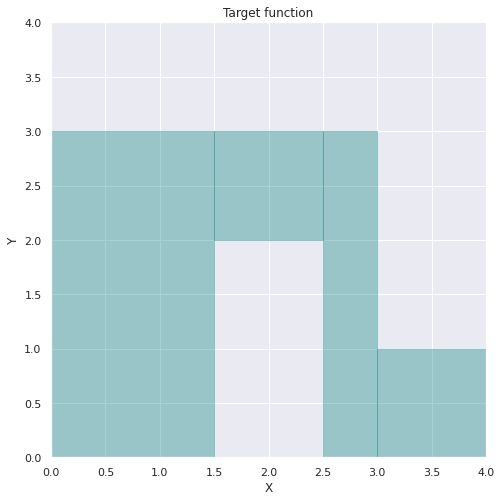

In [2]:
def target_func(x: float, y: float) -> bool:
  """
  Target function (12 варіант)

  Examples: 
    x = 2.7, y = 1.5, target_func(x, y) = True;
    x = 3.23, y = 1.5, target_func(x, y) = False.
  """
  if 0 <= x <= 1.5 and 0 <= y <= 3:
    return True
  if 1.5 < x < 2.5 and 2 <= y <= 3:
    return True
  if 2.5 <= x <= 3 and 0 <= y <= 3:
    return True
  if 3 < x <= 4 and 0 <= y <= 1:
    return True
  return False

REAL_AREA = (1.5 * 3) + (1 * 1) + (0.5 * 3) + (1 * 1)
print(f"Real area: {REAL_AREA}\n")

fig, ax = plt.subplots(figsize=(8, 8))
AREA_COLOR = "#218f8d"
ax.add_patch(Rectangle((0, 0), 1.5, 3, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((1.5, 2), 1, 1, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((2.5, 0), 0.5, 3, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((3, 0), 1, 1, color=AREA_COLOR, alpha=0.4))
plt.xlim([0, 4])
plt.ylim([0, 4])
ax.set_aspect('equal', adjustable='box')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Target function")
plt.show()

## Generate random points and calculate approximate area

In [3]:
X, Y, Z, I, A, E = [], [], [], [], [], []
total_hits = 0
TOTAL_AREA = 4 * 4
SHOTS_AMOUNT = 3000
for i in range(1, SHOTS_AMOUNT + 1):
  x = round(uniform(0, 4), 2)
  y = round(uniform(0, 4), 2)
  z = int(target_func(x, y))
  total_hits += z
  appr_area = (total_hits * TOTAL_AREA) / i
  error = abs(REAL_AREA - appr_area) / REAL_AREA * 100
  I.append(i)
  A.append(appr_area)
  E.append(error)
  X.append(x)
  Y.append(y)
  Z.append(z)

print(f"Total hits: {total_hits} / {I[-1]}\nApproximate area: {round(A[-1], 2)}\nReal area: {REAL_AREA} ({round(E[-1], 2)}% accuracy)")

Total hits: 1472 / 3000
Approximate area: 7.85
Real area: 8.0 (1.87% accuracy)


## Analyse graphs

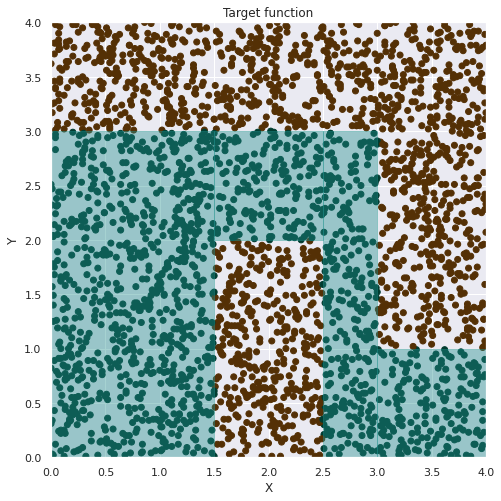

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
AREA_COLOR = "#218f8d"
ax.add_patch(Rectangle((0, 0), 1.5, 3, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((1.5, 2), 1, 1, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((2.5, 0), 0.5, 3, color=AREA_COLOR, alpha=0.4))
ax.add_patch(Rectangle((3, 0), 1, 1, color=AREA_COLOR, alpha=0.4))
mesh = ax.scatter(X, Y, c=Z, alpha=1, cmap='BrBG')
plt.xlim([0, 4])
plt.ylim([0, 4])
ax.set_aspect('equal', adjustable='box')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Target function")
plt.show()

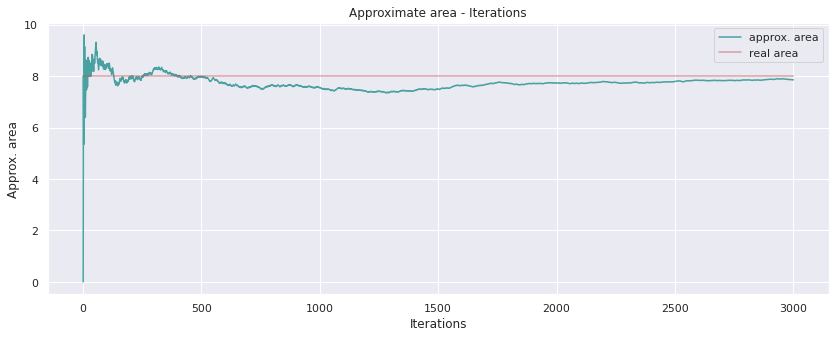

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(I, A, '#218f8d', alpha=0.8, label='approx. area')
plt.plot(I, [REAL_AREA for _ in I], 'r', alpha=0.5, label='real area')
plt.title('Approximate area - Iterations')
plt.xlabel('Iterations')
plt.ylabel('Approx. area')
plt.legend()
plt.show()

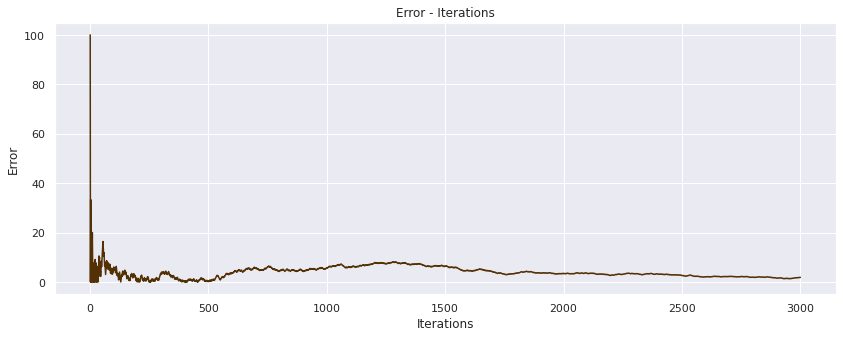

In [6]:
fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(I, E, '#543005', label='error')
plt.title('Error - Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()